## **Introduction to Data Science**

## **Programming Exercise: Lab PCA + Clustering**



### **1. Introduce**

Bộ dữ liệu chứa thông tin về giá trị giao dịch của 30 mã cổ phiếu trên VN30index theo ngày. Thực hiện xử lý dữ liệu, sử dụng PCA để chọn lọc các thuộc tính và Clustering phân cụm để xác định mẫu. Sau đó, tiến hành phân tích và đưa ra đánh giá về thị trường chứng khoán dựa trên bộ dữ liệu.

### **2. Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### **3. Explore Data Analysis**

In [3]:
data = pd.read_pickle("C:\\Users\\DELL\\Downloads\\df_merged.pkl")
data

[                           mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  \
 _time                                                                 
 2023-04-19 02:15:30+00:00     24.750000          78.7          44.6   
 2023-04-19 02:15:40+00:00     24.750000          78.7          44.6   
 2023-04-19 02:15:50+00:00     24.750000          78.7          44.6   
 2023-04-19 02:16:00+00:00     24.750000          78.7          44.6   
 2023-04-19 02:16:10+00:00     24.750000          78.7          44.6   
 ...                                 ...           ...           ...   
 2023-04-19 07:29:40+00:00     24.400000          78.7          44.4   
 2023-04-19 07:29:50+00:00     24.441667          78.7          44.4   
 2023-04-19 07:30:00+00:00     24.433333          78.7          44.4   
 2023-04-19 07:30:10+00:00     24.450000          78.7          44.4   
 2023-04-19 07:30:20+00:00     24.416667          78.7          44.4   
 
                            mua_gia_1BVH  mua_gia_1CTG  mua_gi

In [4]:
type(data)

list

In [5]:
len(data)

23

File pickle dữ liệu bao gồm một danh sách với 23 phần tử. Mỗi phần tử là một dataframe chứa dữ liệu giao dịch cho mỗi ngày từ 20/03/2023 đến 19/04/2023.

Cần kết hợp các dataframe thành một tập dữ liệu giao dịch theo thời gian để tìm ra hướng phân tích.



In [6]:
df = data[22]
for i in range(22):
    df=pd.concat([df, data[22-i-1]])
data = df.reset_index()

In [7]:
data.head()

,_time,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
0,2023-03-20 02:17:00+00:00,24.2,81.1,45.9,49.80,28.733333,79.0,104.0,14.8,18.15,...,0.0,3000.000000,400.0,10.0,1720.0,360.0,0.0,1130.0,120.0,1980.0
1,2023-03-20 02:17:10+00:00,24.2,81.1,45.9,49.80,28.750000,79.0,104.0,14.8,18.15,...,1975.0,3026.666667,0.0,10.0,660.0,660.0,0.0,1030.0,120.0,0.0
2,2023-03-20 02:17:20+00:00,24.2,81.1,45.9,49.55,28.750000,79.0,104.0,14.8,18.15,...,0.0,180.000000,0.0,10.0,700.0,800.0,0.0,1030.0,320.0,0.0
3,2023-03-20 02:17:30+00:00,24.2,81.1,45.9,49.55,28.750000,79.0,104.0,14.8,18.15,...,0.0,310.000000,400.0,0.0,1070.0,40.0,0.0,1000.0,2830.0,2980.0
4,2023-03-20 02:17:40+00:00,24.2,81.1,45.8,49.55,28.700000,78.6,104.0,14.8,18.15,...,1130.0,3370.000000,0.0,50.0,2820.0,40.0,0.0,45.0,2830.0,3010.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30538 entries, 0 to 30537
Columns: 182 entries, _time to ban_kl_2VRE
dtypes: datetime64[ns, tzutc()](1), float64(181)
memory usage: 42.4 MB


In [9]:
data.shape

(30538, 182)

In [10]:
data.columns

Index(['_time', 'mua_gia_1ACB', 'mua_gia_1BCM', 'mua_gia_1BID', 'mua_gia_1BVH',
       'mua_gia_1CTG', 'mua_gia_1FPT', 'mua_gia_1GAS', 'mua_gia_1GVR',
       'mua_gia_1HDB',
       ...
       'ban_kl_2TCB', 'ban_kl_2TPB', 'ban_kl_2VCB', 'ban_kl_2VHM',
       'ban_kl_2VIB', 'ban_kl_2VIC', 'ban_kl_2VJC', 'ban_kl_2VNM',
       'ban_kl_2VPB', 'ban_kl_2VRE'],
      dtype='object', length=182)

In [11]:
timesr = list(data['_time'].values)
onlydate = set([str(pd.to_datetime(x).date()) for x in timesr])
onlydate

{'2023-03-20',
 '2023-03-21',
 '2023-03-22',
 '2023-03-23',
 '2023-03-24',
 '2023-03-27',
 '2023-03-28',
 '2023-03-29',
 '2023-03-30',
 '2023-03-31',
 '2023-04-03',
 '2023-04-04',
 '2023-04-05',
 '2023-04-06',
 '2023-04-07',
 '2023-04-10',
 '2023-04-11',
 '2023-04-12',
 '2023-04-13',
 '2023-04-14',
 '2023-04-17',
 '2023-04-18',
 '2023-04-19'}


Dữ liệu bao gồm 23 ngày từ ngày 20/03/2023 đến ngày 19/04/2023, nhưng không có dữ liệu vào các ngày 25-26/03/2023, 01-02/04/2023 và 15-16/04/2023.

In [12]:
column_names = data.columns
count_mua_gia = len(column_names[column_names.str.contains('mua_gia')])
count_ban_gia = len(column_names[column_names.str.contains('ban_gia')])
count_mua_kl1 = len(column_names[column_names.str.contains('mua_kl_1')])
count_ban_kl1 = len(column_names[column_names.str.contains('ban_kl_1')])
count_mua_kl2 = len(column_names[column_names.str.contains('mua_kl_2')])
count_ban_kl2 = len(column_names[column_names.str.contains('ban_kl_2')])

print("Number of 'mua_gia' columns:", count_mua_gia)
print("Number of 'ban_gia' columns:", count_ban_gia)
print("Number of 'mua_kl1' columns:", count_mua_kl1)
print("Number of 'ban_kl1' columns:", count_ban_kl1)
print("Number of 'mua_kl2' columns:", count_mua_kl2)
print("Number of 'ban_kl2' columns:", count_ban_kl2)

Number of 'mua_gia' columns: 30
Number of 'ban_gia' columns: 30
Number of 'mua_kl1' columns: 30
Number of 'ban_kl1' columns: 30
Number of 'mua_kl2' columns: 30
Number of 'ban_kl2' columns: 30


Sau khi kết hợp các bảng dữ liệu, chúng ta thu được một bộ dữ liệu gồm 30538 hàng và 182 cột tương ứng với 6 thuộc tính: `_time`, `mua_gia`, `ban_gia`, `mua_kl_1`,`ban_kl_1`, `mua_kl_2`, `ban_kl_2` cho 30 mã cổ phiếu (ACB, BCM, BID, BVH, ...) trên VN30index và `Gia KL` đại diện cho giá phái sinh tại thời điểm hiện tại."

* `_time`: Thuộc tính này biểu thị thời gian hoặc dấu thời gian liên quan đến mỗi dòng dữ liệu trong khoảng 23 ngày từ 20/03/2023 đến 19/04/ 2023, không bao gồm các ngày 25-26 tháng 3, 1-2 tháng 4 và 15-16 tháng 4, 2023.

* `mua_gia, ban_gia`: Các thuộc tính này liên quan đến giá mua (mua_gia) và giá bán (ban_gia) tương ứng. Chúng đại diện cho giá mà người mua sẵn lòng mua một chứng khoán và người bán sẵn lòng bán nó, tương ứng.

* `mua_kl_1, ban_kl_1, mua_kl_2, ban_kl_2`: Các thuộc tính này liên quan đến khối lượng giao dịch. "mua_kl_1" và "ban_kl_1" đại diện cho khối lượng cổ phiếu dự kiến được mua và bán ở mức độ đầu tiên (có thể là mức giá mua và bán tốt nhất), trong khi "mua_kl_2" và "ban_kl_2" đại diện cho khối lượng ở mức độ thứ hai.

* `Gia KL` (VN30index): Thuật ngữ này đề cập đến giá phái sinh (Futures price) trên VN30index. Giá phái sinh được tính dựa trên điều kiện thị trường hiện tại và được sử dụng để đầu cơ hoặc chống lại các biến động giá trong tương lai trên VN30index, đây là một chỉ số đại diện cho hiệu suất của 30 cổ phiếu hàng đầu được niêm yết trên thị trường chứng khoán Việt Nam. Giá phái sinh đại diện cho giá đã thỏa thuận mà một người mua và người bán sẽ thực hiện trong tương lai.

**Phân tích biến động của 30 mã cổ phiếu trên VN30index**\
'VNM',
 'GVR',
 'ACB',
 'TPB',
 'BID',
 'MWG',
 'PDR',
 'VJC',
 'VIC',
 'STB',
 'SSI',
 'GAS',
 'POW',
 'HDB',
 'MSN',
 'HPG',
 'VHM',
 'VIB',
 'BCM',
 'TCB',
 'CTG',
 'BVH',
 'PLX',
 'VRE',
 'FPT',
 'SAB',
 'VPB',
 'VCB',
 'NVL',
 'MBB'

In [13]:
# Get name of 30
stock_names = [col[-3:] for col in column_names[1:31]]
unique_stock_names = list(set(stock_names))

Trong một ngày có rất nhiều giao dịch xảy ra tuy nhiên để dễ phân tích và so sánh ta thực hiện lấy trung bình để đại diện ngày đó.

In [14]:
data['_time'] = pd.to_datetime(data['_time']).dt.date
df_daily_avg = data.groupby('_time').mean()
df_daily_avg.head()

,mua_gia_1ACB,mua_gia_1BCM,mua_gia_1BID,mua_gia_1BVH,mua_gia_1CTG,mua_gia_1FPT,mua_gia_1GAS,mua_gia_1GVR,mua_gia_1HDB,mua_gia_1HPG,...,ban_kl_2TCB,ban_kl_2TPB,ban_kl_2VCB,ban_kl_2VHM,ban_kl_2VIB,ban_kl_2VIC,ban_kl_2VJC,ban_kl_2VNM,ban_kl_2VPB,ban_kl_2VRE
_time,,,,,,,,,,,,,,,,,,,,,
2023-03-20,24.106624,81.029513,45.610406,49.397903,28.505816,78.227416,103.294270,14.564015,17.854510,20.296673,...,945.011860,2084.149331,218.485643,863.796576,2728.533030,463.157553,21.931586,490.564295,9739.657060,263.390859
2023-03-21,24.065748,80.613254,45.109280,48.954207,28.202663,77.692250,103.068739,14.310216,17.655812,20.025325,...,3500.374517,1527.128426,377.925416,848.187906,1633.181931,284.492784,36.393398,837.501986,41069.184372,399.708861
2023-03-22,24.173907,80.872683,45.918112,48.846350,28.469152,77.988175,102.944717,14.521364,17.603412,20.374673,...,2376.394000,2065.667786,359.008119,1007.454015,1363.815556,398.042500,27.652333,317.846667,48082.063391,2141.397190
2023-03-23,24.105340,80.638340,45.626323,48.615161,28.317287,77.802377,102.364002,14.383944,17.578191,20.175629,...,1923.213153,1722.031758,321.240922,576.094919,1853.700000,757.105240,44.741016,668.527385,26247.599422,541.827138
2023-03-24,24.625249,81.304241,45.751623,48.514621,28.630245,78.377431,102.799596,14.832887,17.937816,20.377448,...,4075.585317,2674.485509,106.064797,1207.841042,6197.388118,872.001594,44.900422,547.112723,28446.454090,1508.937252


In [15]:
df_daily_avg.shape

(23, 181)

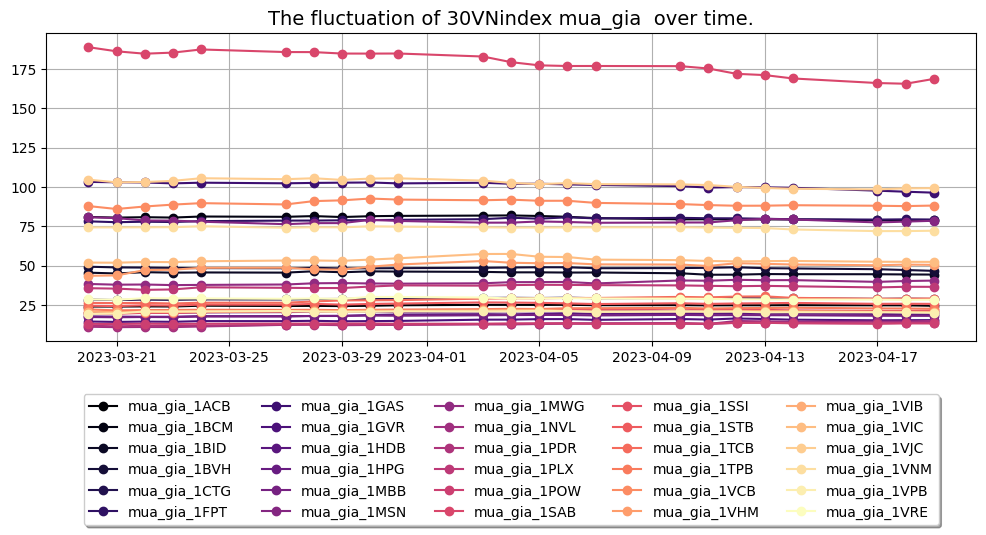

In [16]:
num_lines = len(df_daily_avg.columns[0:30])
colors = plt.cm.magma(np.linspace(0, 1, num_lines))

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('The fluctuation of 30VNindex mua_gia  over time.', size = 14)

for i, col in enumerate(df_daily_avg.columns[0:30]):
    ax.plot(df_daily_avg.index, df_daily_avg[col], marker='o', label=col, color=colors[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.grid()
plt.show()

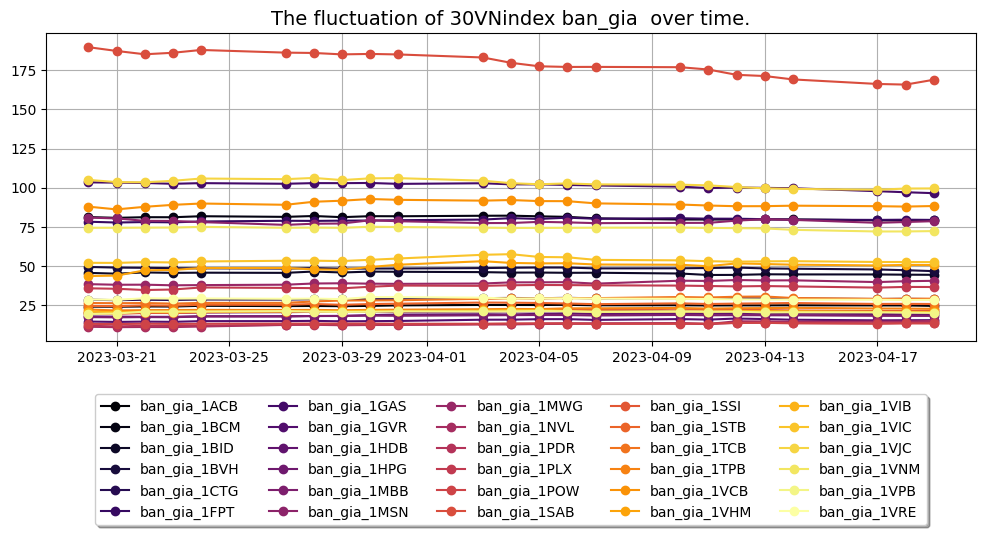

In [17]:
num_lines = len(df_daily_avg.columns[0:30])
colors = plt.cm.inferno(np.linspace(0, 1, num_lines))

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('The fluctuation of 30VNindex ban_gia  over time.', size = 14)

for i, col in enumerate(df_daily_avg.columns[30:60]):
    ax.plot(df_daily_avg.index, df_daily_avg[col], marker='o', label=col, color=colors[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.grid()
plt.show()

Nhìn chung giá mua và giá của 30 mã cổ phiếu có giá trị khá là tương đương với nhau và đều ổn định, không có quá nhiều biến động trong vòng 23 ngày và có giá trị dao động từ 10 - 110. Trong đó:
- Mã cổ phiếu có giá trị mua/bán cao nhất là SAB. Giá mua SAB có xu hướng giảm nhẹ.
- Mã cổ phiếu có giá trị mua/bán cao nhất là NVL.

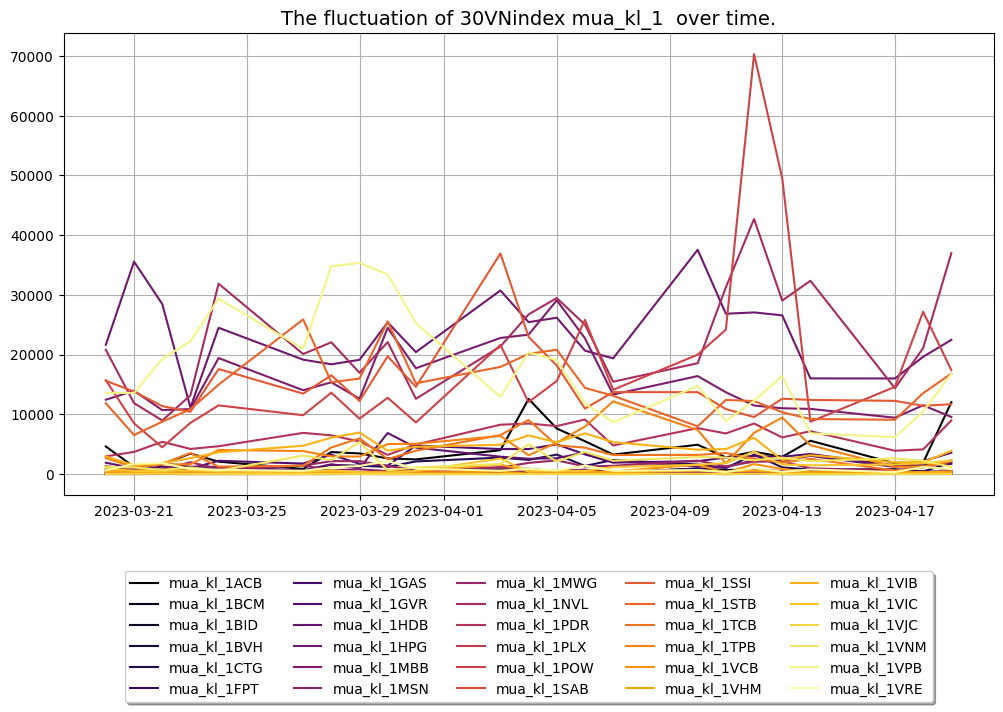

In [18]:
num_lines = len(df_daily_avg.columns[0:30])
colors = plt.cm.inferno(np.linspace(0, 1, num_lines))

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('The fluctuation of 30VNindex mua_kl_1  over time.', size = 14)

for i, col in enumerate(df_daily_avg.columns[61:91]):
    ax.plot(df_daily_avg.index, df_daily_avg[col], label=col, color=colors[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.grid()
plt.show()

Số lượng mua cổ phiếu (mua_kl_1) với giá bán thứ nhất (gia_ban_1) trong vòng 23 ngày của 30 mã cổ phiếu có nhiều biến động tăng giảm rất khác nhau. 
- Đa số đều ổn định số lượng dao động không quá lớn.
- Cổ phiếu SAB có số lượng biến động khá lớn, số lượng mua nhiều nhất và tăng mạnh vào khoảng ngày 12/04 sau đó giảm mạnh.
- Bên cạnh đó cổ phiếu NVL, POW, HPG, VPB cũng có số lượng biến động khá lớn theo từng ngày.

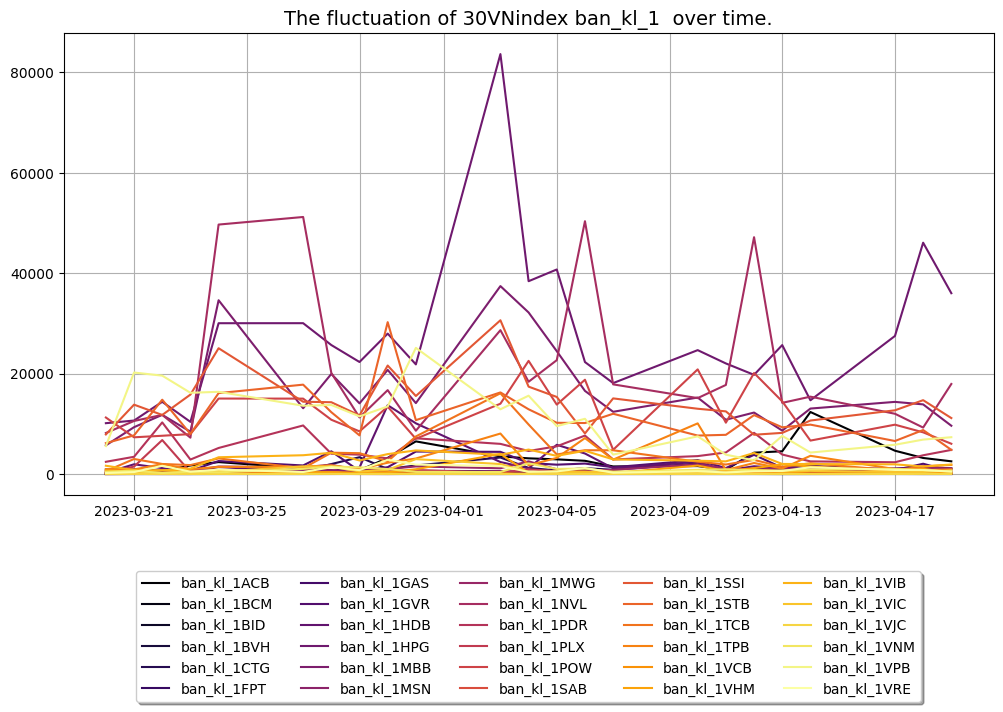

In [19]:
num_lines = len(df_daily_avg.columns[0:30])
colors = plt.cm.inferno(np.linspace(0, 1, num_lines))

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('The fluctuation of 30VNindex ban_kl_1  over time.', size = 14)

for i, col in enumerate(df_daily_avg.columns[91:121]):
    ax.plot(df_daily_avg.index, df_daily_avg[col], label=col, color=colors[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.grid()
plt.show()

Số lượng bán cổ phiếu (ban_kl_1) với giá mua thứ nhất (gia_mua_1) trong vòng 23 ngày của 30 mã cổ phiếu có nhiều biến động tăng giảm rất khác nhau. 
- Đa số đều ổn định số lượng dao động không quá lớn.
- Cổ phiếu HPG có số lượng bán ra nhiều nhất và có biến động khá lớn, tăng mạnh vào khoảng ngày 02/04 sau đó giảm mạnh và về sau có xu hướng tăng.
- Bên cạnh đó cổ phiếu NVL, VPB, SSI cũng có số lượng biến động khá lớn theo từng ngày.

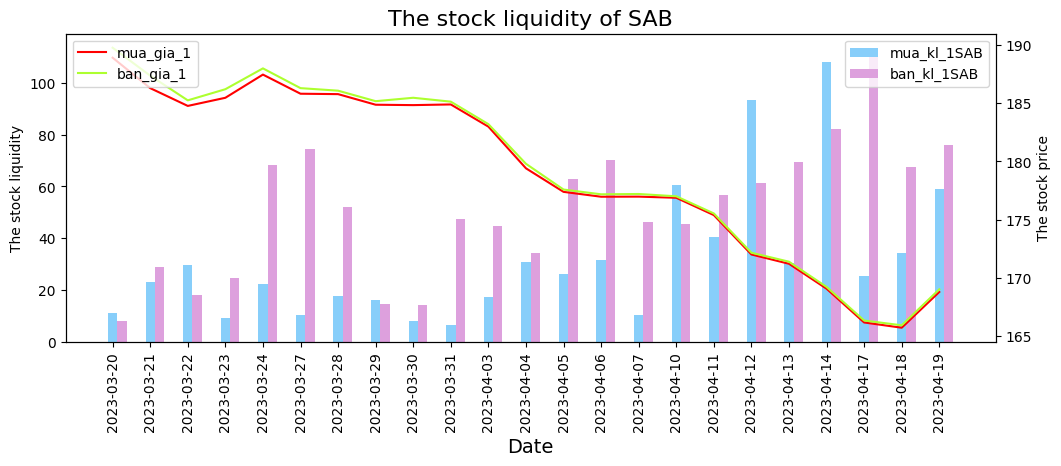

In [20]:
fig, ax = plt.subplots(figsize=(12,4))
r = np.arange(len(df_daily_avg))
width = 0.25
ax.bar(r, df_daily_avg['mua_kl_1SAB'], color ='lightskyblue', width = width, label = 'mua_kl_1SAB')
ax.bar(r+width, df_daily_avg['ban_kl_1SAB'], color ='plum', width = width, label = 'ban_kl_1SAB')
plt.xticks(r,df_daily_avg.index, rotation = 90)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('The stock liquidity')
plt.legend(loc = 1 )
ax1 =ax.twinx()
ax1.plot(r,df_daily_avg['mua_gia_1SAB'], color ='red', label = 'mua_gia_1')
ax1.plot(r,df_daily_avg['ban_gia_1SAB'], color ='greenyellow', label = 'ban_gia_1')
ax1.grid(False)
plt.legend(loc = 2)
plt.ylabel('The stock price')
plt.title("The stock liquidity of SAB", fontsize=16)
plt.show()

Từ các phân tích ở trên, SAB là cổ phiếu có giá mua và bán cao nhất trong 30 mã cổ phiếu cũng có nhiều biến động số lượng mua/ bán trong vòng 23 ngày.
Qua biểu đồ biến động trên, có thể thấy rằng:
- Ban đầu, giá mua và bán không có nhiều biến động nhưng có giảm nhẹ và tăng lên 21/03 - 27/03. Vào lúc này, số lượng cổ phiếu bán ra tăng lên khá cao sau đó giảm xuống và có xu hướng tăng lên.
- Sau đó, khi giá mua và bán có xu hướng giảm thì số lượng cổ phiếu mua và số lượng bán tăng mạnh và số lượng mua/bán cao nhất khi giá giảm thấp nhất sau đó giảm dần.

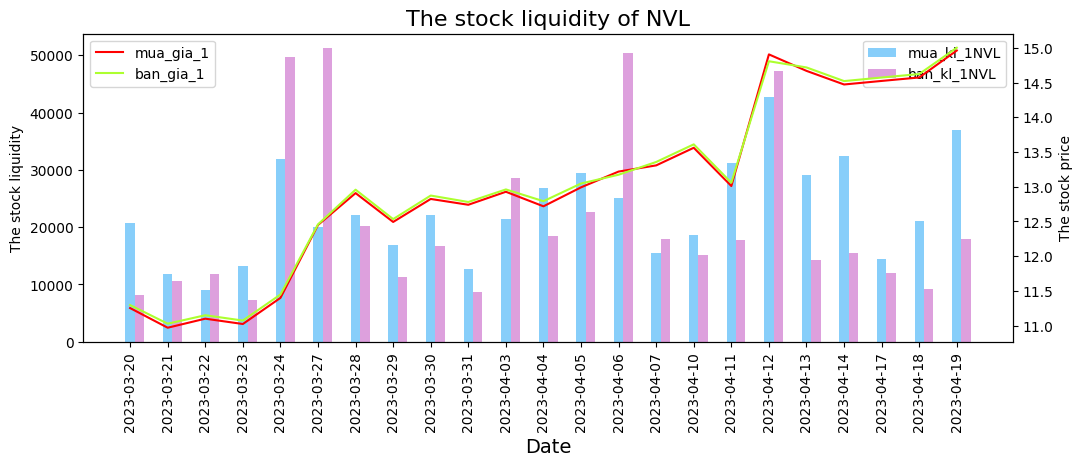

In [21]:
fig, ax = plt.subplots(figsize=(12,4))
r = np.arange(len(df_daily_avg))
width = 0.25
ax.bar(r, df_daily_avg['mua_kl_1NVL'], color ='lightskyblue', width = width, label = 'mua_kl_1NVL')
ax.bar(r+width, df_daily_avg['ban_kl_1NVL'], color ='plum', width = width, label = 'ban_kl_1NVL')
plt.xticks(r,df_daily_avg.index, rotation = 90)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('The stock liquidity')
plt.legend(loc = 1)
ax1 =ax.twinx()
ax1.plot(r,df_daily_avg['mua_gia_1NVL'], color ='red', label = 'mua_gia_1')
ax1.plot(r,df_daily_avg['ban_gia_1NVL'], color ='greenyellow', label = 'ban_gia_1')
ax1.grid(False)
plt.legend(loc = 2)
plt.ylabel('The stock price')
plt.title("The stock liquidity of NVL", fontsize=16)
plt.show()

Từ biểu đồ, ta có nhận xét về sự biến động của cổ phiếu NVL trong vòng 23 ngày như sau:
- Ban đầu (20/03 - 28/03), giá mua và bán thấp bình ổn sau đó tăng lên, lúc này số lượng mua và bán tăng mạnh.
- Tiếp đó (28/03 10/04), giá bán và mua khá ổn định nên số lương mua và bán không có biến động lớn. Tuy nhiện số lượng bán tăng lên khá cao vào ngày 06/04 do giá bán có phần tăng nhẹ.
- Sau đó, giá mua và bán bắt đầu giảm và tăng lên đột biến, lúc này số lượng mua và bán tăng lên cao và giảm xuống khi giá mua và giá bán bắt đầu ổn định.

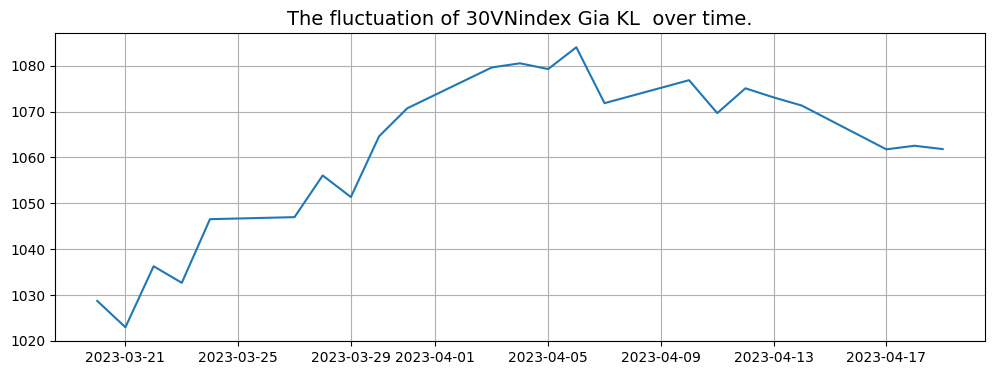

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('The fluctuation of 30VNindex Gia KL  over time.', size = 14)

ax.plot(df_daily_avg.index, df_daily_avg['Gia KL'], label= "Gia KL")
plt.grid()
plt.show()

Dựa vào đồ thị có thể thấy rằng trong vòng 23 ngày giá phái sinh (Gia KL) ban đầu có xu hướng tăng lên sau đó bình ổn và giảm nhẹ. Sự biến động của giá phái sinh chịu tác động của tình hình cung cầu trên thị trường. Mặt khác, cung cầu trên thị trường chứng khoán là các yếu tố như giá mua, giá bán, số lượng mua KL, số lượng bán KL. Sự biến động trong giá mua, giá bán, và khối lượng mua/bán có thể gợi ý về sự chuyển động của thị trường và tạo ra cơ hội giao dịch cho các nhà đầu tư phái sinh.

Để phân tích sự ảnh ảnh của những yếu tố trên đến giá phái sinh cũng như dự đoán sự biến động của giá phái sinh "Gia KL" trên thị trường, ta sẽ thực hiện PCA để giảm chiều lọc features và K-Means phân cụm để đánh giá tổng thể thị trường cũng như biến động của giá phái sinh.

### **4. Data Preprocessing**

**4.1 - Impution Missing value**

In [23]:
missing_value = 0
for i in data.isna().sum():
    if i != 0:
        missing_value+=1
print('Number of columns with missing values: ',missing_value )

Number of columns with missing values:  0


In [24]:
zero_count_per_column = data.eq(0).sum()

for i in range(len(data.columns)):
    if zero_count_per_column[i] != 0:
        print(data.columns[i], ": " ,zero_count_per_column[i])

mua_kl_1ACB :  11770
mua_kl_1BCM :  26372
mua_kl_1BID :  16856
mua_kl_1BVH :  23208
mua_kl_1CTG :  13165
mua_kl_1FPT :  18730
mua_kl_1GAS :  20627
mua_kl_1GVR :  12571
mua_kl_1HDB :  13227
mua_kl_1HPG :  1422
mua_kl_1MBB :  4413
mua_kl_1MSN :  11364
mua_kl_1MWG :  9425
mua_kl_1NVL :  1923
mua_kl_1PDR :  9139
mua_kl_1PLX :  18211
mua_kl_1POW :  7146
mua_kl_1SAB :  23541
mua_kl_1SSI :  1532
mua_kl_1STB :  3584
mua_kl_1TCB :  10751
mua_kl_1TPB :  13947
mua_kl_1VCB :  17562
mua_kl_1VHM :  15219
mua_kl_1VIB :  10789
mua_kl_1VIC :  11715
mua_kl_1VJC :  24184
mua_kl_1VNM :  11613
mua_kl_1VPB :  4878
mua_kl_1VRE :  14141
ban_kl_1ACB :  15527
ban_kl_1BCM :  27531
ban_kl_1BID :  19167
ban_kl_1BVH :  24333
ban_kl_1CTG :  16482
ban_kl_1FPT :  21733
ban_kl_1GAS :  23024
ban_kl_1GVR :  14894
ban_kl_1HDB :  16046
ban_kl_1HPG :  1909
ban_kl_1MBB :  6191
ban_kl_1MSN :  14782
ban_kl_1MWG :  12365
ban_kl_1NVL :  2938
ban_kl_1PDR :  10780
ban_kl_1PLX :  18195
ban_kl_1POW :  7716
ban_kl_1SAB :  23880
ban_k

Nhận thấy, không tồn tại các giá trị NaN trong bộ dữ liệu nhưng thay vào đó là các giá trị bằng 0 tại các thuộc tính mua_gia_kl và ban_gia_kl có số lượng khá lớn. 
Sở dĩ các giá trị này bằng 0.00 là vì tại thời điểm đó không có xảy ra giao dịch chứng khoán. Tuy nhiên để tiện cho việc phân tích ảnh hưởng của các thuộc tính này đến `Gia KL`ta thay thế bằng các giá trị trung bình.

In [25]:

df = data.copy()
for i in range(1, len(data.columns)):
    val = df.iloc[:,i].mean()
    df.iloc[:,i] = df.iloc[:,i].replace(0, val)

In [26]:
zero_count_per_column = df.eq(0).sum()
sum = 0
for i in zero_count_per_column:
    if i != 0:
        sum+=1
print('Number of columns with 0.00 value: ',sum )

Number of columns with 0.00 value:  0


**4.2 - Deleting outliers**

In [27]:
def remove_outliers(df):
    processed_df = pd.DataFrame()

    for col in df.columns:     
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        processed_df[col] = df[col][(df[col] > lower_bound) & (df[col] < upper_bound)]

    return processed_df

In [28]:
df = remove_outliers(df)
df.shape

(30538, 182)

**4.2 - Split data**

In [29]:
time = data['_time']
time = np.array(time).reshape(-1, 1)
time

array([[datetime.date(2023, 3, 20)],
       [datetime.date(2023, 3, 20)],
       [datetime.date(2023, 3, 20)],
       ...,
       [datetime.date(2023, 4, 19)],
       [datetime.date(2023, 4, 19)],
       [datetime.date(2023, 4, 19)]], dtype=object)

In [30]:
X = data.drop(['_time','Gia KL'],axis = 1).values
y = data['Gia KL'].values

**4.3 - Data scaling**

Với bộ dữ liệu là các giá cổ phiếu có thể biến động rất lớn (tăng tối đa hoặc giảm tối đa vào những ngày khác nhau), việc sử dụng StandardScaler thường là lựa chọn tốt hơn. 

In [31]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
y =sc.fit_transform(y.reshape(-1,1))

### **5. PCA (Principal component analysis)**

Nhận thấy bộ dữ liệu  bao gồm rất nhiều chiều với nhiều features nên việc phân tích và xây dựng mô hình dự đoán có thể sẽ gặp khó khăn.

Chính vì vậy ta sẽ áp dụng phương pháp Principal Component Analysis (Phương pháp phân tích thành phần chính). Mục đích là để giảm số chiều của dữ liệu bằng cách chuyển đổi tập dữ liệu ban đầu sang hệ thống tọa độ mới dựa trên các thành phần chính mà không mất đi quá nhiều thông tin, từ đó giúp giảm sự phức tạp và dễ phân tích hơn.

##### **Nhóm theo thuộc tính**

In [ ]:
mua_gia = X_std[:, 0:30]
ban_gia = X_std[:, 30:60]
mua_kl_1 = X_std[:, 60:90]
ban_kl_1 = X_std[:, 90:120]
mua_kl_2 = X_std[:, 120:150]
ban_kl_2 = X_std[:, 150:-1]

Với mỗi thuộc tính trên dều chứa giá trị của 30 mã cổ phiếu nên số lượng feature sẽ rất lớn. Vì thế ta dùng PCa để giảm chiều về 1 chiều duy nhất đại diện cho mỗi feature để phân tích được đơn giản hơn.

In [ ]:
pca = PCA(n_components = 1)
ban_gia_pca = pca.fit_transform(ban_gia)
mua_gia_pca = pca.fit_transform(mua_gia)


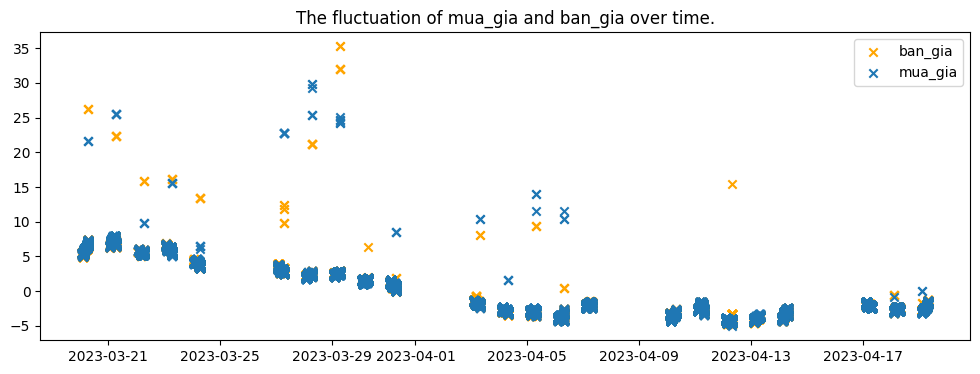

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title('The fluctuation of mua_gia and ban_gia over time.')
ax.scatter(time, ban_gia_pca, marker = 'x', color='orange',label = 'ban_gia')
ax.scatter(time, mua_gia_pca, marker = 'x',label = 'mua_gia')
ax.legend()
plt.show()

Nhận thấy rằng, mua giá và bán giá của cổ phiếu trên thị trường hoàn toàn khá khớp với nhau nên ta có thể gộp 2 trường này lại thành một feature duy nhất là giá cổ phiếu trên thị trường. 



In [ ]:
ban_kl1_pca = pca.fit_transform(ban_kl_1)
mua_kl1_pca = pca.fit_transform(mua_kl_1)
ban_kl2_pca = pca.fit_transform(ban_kl_2)
mua_kl2_pca = pca.fit_transform(mua_kl_2)

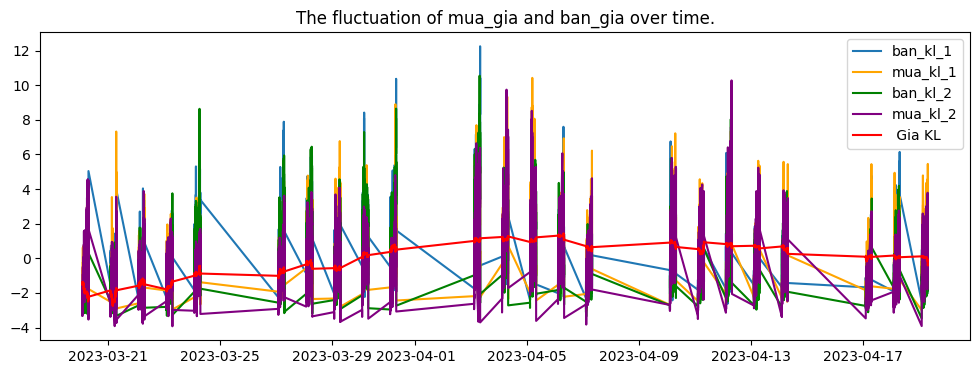

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title('The fluctuation of mua_gia and ban_gia over time.')
ax.plot(time, ban_kl1_pca, label='ban_kl_1')
ax.plot(time, mua_kl1_pca, color='orange', label='mua_kl_1')
ax.plot(time, ban_kl2_pca, color='green', label='ban_kl_2')
ax.plot(time, mua_kl2_pca, color='purple', label='mua_kl_2')
ax.plot(time, y, label = ' Gia KL', color = 'red')
ax.legend()
plt.show()


`mua_kl_1`những thuộc tính ,`ban_kl_1`, `mua_kl_2`, `ban_kl_2` có sự biến động sai khác nhau theo thời gian chứng tỏ những thuộc tính này sẽ có những ảnh hưởng khác nhau đến thị trường chứng khoán.

##### **Tổng thể các feature**

In [ ]:
pca = PCA(0.8)
X_pca = pca.fit_transform(X_std)
print(">> Num. components that preserve 80% of the variance: ", pca.n_components_)
X_pca.shape

>> Num. components that preserve 80% of the variance:  68


(30538, 68)

Ta thực hiện xây dựng thuật toán PCA trên dữ liệu bằng cách sử dụng thư viện scikit-learn trong Python. Với mong muốn giảm số lượng chiều xuống tái cấu trúc dữ liệu ban đầu với mong muốn giữ lại các thành phần chính sao cho chúng giải thích được ít nhất 80% phương sai của dữ liệu ban đầu.

In [ ]:
print(">> Explained variance ratio of 68 features: ", pca.explained_variance_ratio_)

>> Explained variance ratio of 68 features:  [0.16797986 0.0992044  0.02749676 0.02334466 0.01876222 0.01715488
 0.01493303 0.01345764 0.01242489 0.01199502 0.01136499 0.0105474
 0.01023806 0.00998646 0.00966677 0.00951458 0.00903914 0.00871838
 0.00863999 0.00836813 0.00818658 0.00812984 0.00798825 0.0078324
 0.00780054 0.00775958 0.00763125 0.00750817 0.00739868 0.00725752
 0.007131   0.00700432 0.00694528 0.00690572 0.00679012 0.00673423
 0.00669482 0.00662561 0.00657133 0.00648573 0.00641329 0.00636677
 0.00622972 0.00618256 0.00614678 0.00602454 0.00598209 0.00592308
 0.00585721 0.00575759 0.0057074  0.00560861 0.0055757  0.00550541
 0.00541268 0.00533008 0.0052623  0.00520979 0.00511297 0.00500755
 0.00495952 0.00487976 0.00474756 0.00469138 0.00457534 0.00451599
 0.00449012 0.00437147]


- Principal component thứ 1 (0.16797986) cho biết rằng thành phần chính đầu tiên chiếm khoảng 16.8% tổng phương sai trong dữ liệu.
- Principal component thứ 2 (0.0992044) cho biết rằng thành phần chính thứ hai chiếm khoảng 9.9% tổng phương sai.
- Các component tiếp theo đóng góp một phần tương đối nhỏ trong tổng phương sai của dữ liệu.



In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = [explained_variance_ratio[0]]
cumulative_sum = explained_variance_ratio[0]

for i in range(1, len(explained_variance_ratio)):
    cumulative_sum += explained_variance_ratio[i]
    cumulative_variance_ratio.append(cumulative_sum)

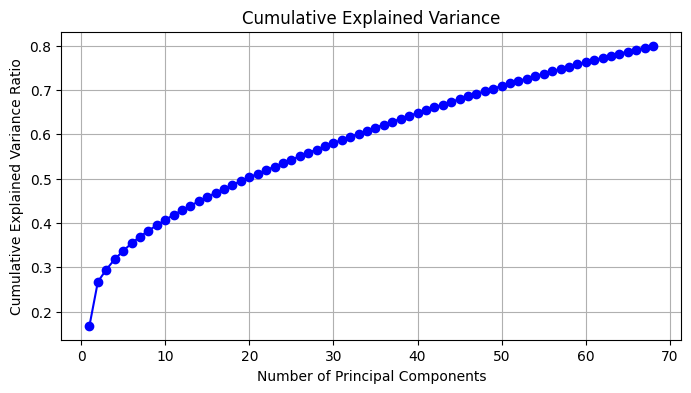

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


Hai thành phần đầu tiên cùng nhau chiếm khoảng 26.7% của phương sai (16.8% + 9.9%). Với giá trị giải thích phương sai cao hơn so với các features còn lại, chúng có khả năng đại diện hiệu quả cho dữ liệu gốc.

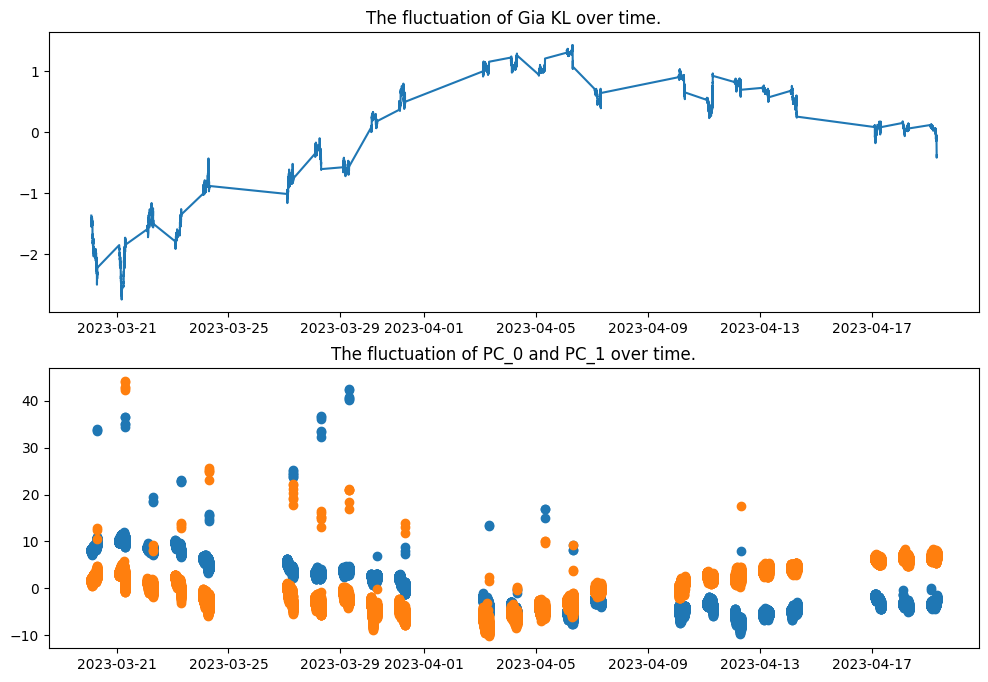

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,8))
ax[0].set_title("The fluctuation of Gia KL over time.")
ax[0].plot(time, y, label = ' Gia KL')
ax[1].set_title("The fluctuation of PC_0 and PC_1 over time.")
ax[1].scatter(time, X_pca[:, 0],label = 'Pricipal component 0')
ax[1].scatter(time, X_pca[:, 1],label = 'Pricipal component 1')
plt.show()

Từ 2 biểu đồ trên, có thể thấy được sự tương quan tăng/ giảm theo thời gian giữa 2 pricipal component chính (2 features mới) và giá KL có sự chuyển biến khá liên quan với nhau. Ban đầu, có thể thấy giá phái sinh có xu hướng tăng dần đến một thời điểm nhất định thì sau đó có xu thế duy trì và giảm nhẹ. Ứng với cùng một thời điểm, cả 2 features đều có xu hướng giảm đến khi giá trị của chúng tương  trùng lặp với nhau thì giá phái sinh lại tăng cao nhất sau đó ta thấy sự chuyển biến khác nhau giữa 2 features một cái tiếp tục giảm và một cái có xu hướng tăng lên.

Với các thuộc tính ban đầu của dữ liệu và dựa vào các yếu tố ảnh hưởng đến sự tăng giảm giá phái sinh theo thời gian cùng với đồ thị biểu diễn 2 features principal component theo thời gian ở trên, ta có thể dự đoán:
* X_pca[:, 0] (feature 0 - màu xanh dương) đại diện cho `ban_kl` - cung trên thị trường. Khi giá trị của mua_kl tăng tức là số lượng cổ phiếu đang được mua trên thị trường đang có xu hướng tăng lên, lúc này cầu sẽ tăng và ngược lại giá trị mua_kl giảm thì cầu lúc này sẽ giảm.
* X_pca[:, 1] (feature 1 - màu cam) đại diện cho `mua_kl`- cầu trên thị trường. Khi giá trị của bán_kl tăng, nghĩa là trong khoảng thời gian đó có nhiều cổ phiếu được bán ra hơn, lúc này cung tăng và tương tự ngược lại khi giá trị của bán_kl giảm thì cung cũng sẽ giảm. 


Để có thể đưa ra hướng phân tích, ta cần tiến hành K-means phân cụm để có thể có những nhận định rõ hơn về sự biến động của giá phái sinh và 2 features, theo thời gian.

### **6. Clustering by K-Means**

 K-means là một phương pháp được sử dụng để phân loại dữ liệu vào các cụm (clusters) bằng cách tìm ra K cụm (clusters) sao cho tổng bình phương khoảng cách từ các điểm dữ liệu tới trung tâm của cụm (centroid) là nhỏ nhất.

In [ ]:
# Nối data pca với y để thực hiện phân cụm
X_pca_to_K_mean = np.concatenate([X_pca[:,0:2], y.reshape(-1,1)], axis=1)
X_pca_to_K_mean.shape

(30538, 3)

Sử dụng phương pháp Elbow để dự đoán giá trị tối ưu của số lượng cụm (n_clusters) trong thuật toán K-means. Elbow thực hiện K-means với một loạt số lượng cluster khác nhau và tính toán SSE cho từng kết quả phân cụm. 

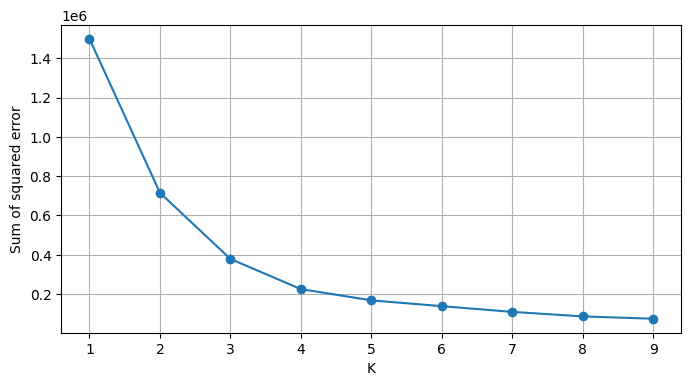

In [ ]:
sse = []
k_rng = range(1, 10, 1)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_pca_to_K_mean)
    sse.append(km.inertia_)
plt.figure(figsize = (8,4))    
plt.plot(k_rng,sse,marker="o")
plt.xlabel("K")
plt.grid()
plt.ylabel("Sum of squared error")
plt.show()

Dựa vào kết quả của đồ thị này, ta có thể thấy điểm gập của "cánh tay" ứng với số lượng cluster tối ưu là 3 cùng với trực quan của 2 principal component chính theo thời gian ở phía trên. Từ đây, có thể đưa ra quyết định chọn n_cluster = 3 để thực hiện K-Means. 

In [ ]:
kmeans = KMeans(n_clusters= 3).fit(X_pca_to_K_mean)
label = kmeans.predict(X_pca_to_K_mean)

In [ ]:

X_pca_to_K_mean_label = np.concatenate([X_pca_to_K_mean, label.reshape(-1,1)], axis =1 )

In [ ]:
processed_df = np.concatenate([X_pca_to_K_mean_label, time.reshape(-1,1)], axis=1)
processed_df.shape

(30538, 5)

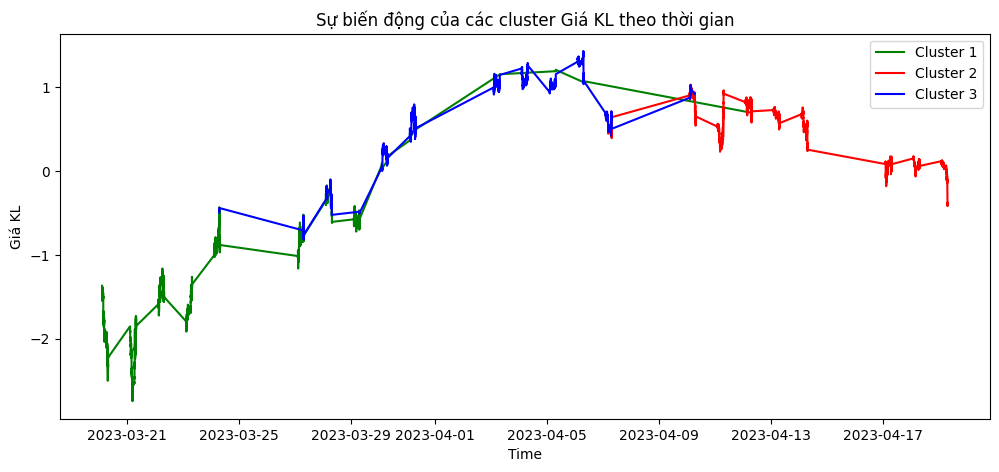

In [ ]:
colors = ['green', 'red','blue']
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_ylabel( 'Giá KL')
ax.set_xlabel('Time')
ax.set_title("The fluctuation of cluster PC_0 and PC_1 over time.")
for i in range(3):
    k = processed_df[processed_df[:, 3] == i]
    plt.plot(k[:, -1], k[:, 2], color = colors[i], label = 'Cluster ' + str(i+1))
ax.legend()
plt.show()

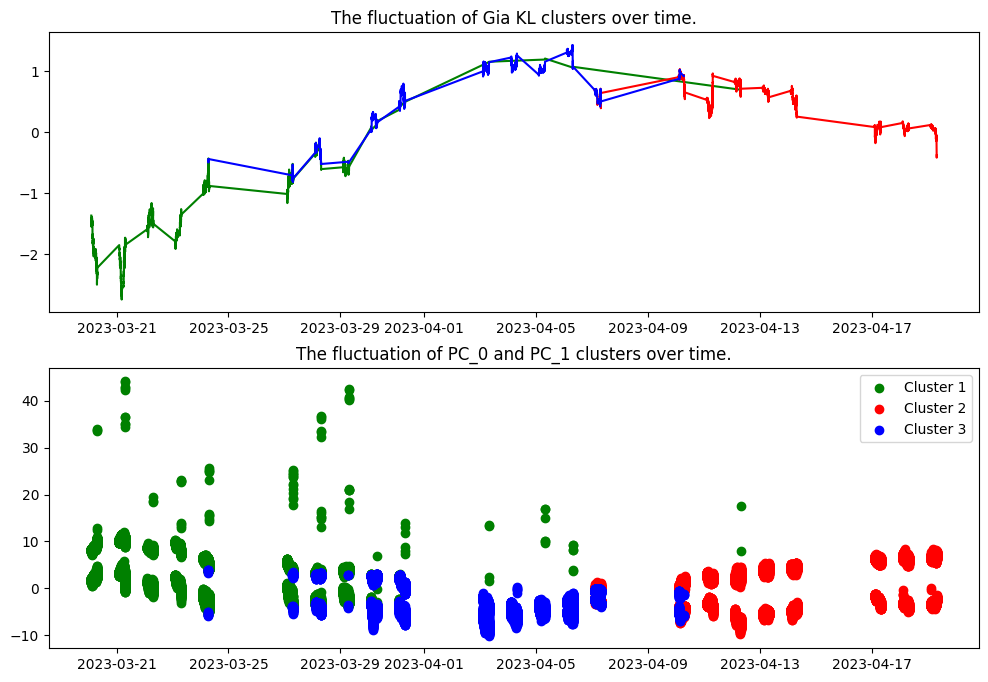

In [ ]:
colors = ['green','red', 'blue']
fig, ax = plt.subplots(2,1, figsize = (12,8))
ax[0].set_title("The fluctuation of Gia KL clusters over time.")
for i in range(3):
    k = processed_df[processed_df[:, 3] == i]
    ax[0].plot(k[:, -1], k[:, 2], color = colors[i], label = 'Cluster ' + str(i+1))
ax[1].set_title("The fluctuation of PC_0 and PC_1 clusters over time.")
for i in range(3):
    k= processed_df[processed_df[:, 3] == i]
    ax[1].scatter(k[:, -1], k[:, 0], color = colors[i],label = 'Cluster ' + str(i+1))
    ax[1].scatter(k[:, -1], k[:, 1], color = colors[i])
ax[1].legend()
plt.show()

Sau khi phân cụm và trực quan dữ liệu, ta có thể nhận thấy rõ sự phân hóa của 3 cụm rõ rệt theo thời gian ứng với sự thay đổi biến động tăng giảm của giá kl và 2 features ứng với cung và cầu.  Cụ thể, trong khoảng 30 ngày (từ 20/03 - 19/04/2023), giá phái sinh và cung, cầu có những biến động như sau:
- Cluster 1 (màu xanh lá) ứng khoảng thời gian 10 ngày từ 20/03 - 01/04/2023: Ta thấy giá trị cung và cầu đồng thời giảm xuống và giá phái sinh thì có xu hướng tăng lên. 

- Cluster 2 (màu xanh dương) khoảng 10 ngày tiếp theo từ 01/04 - 10/04/2023: Khi cung giảm xuống gần với cầu, với cầu và cung ổn định và bằng nhau, giá phát sinh ổn định và cầu vượt qua cung, lúc này giá phái sinh tăng mạnh. Điều này có nghĩa là số lượng người muốn mua phái sinh vượt qua số lượng người muốn bán phái sinh, gây nên sự tăng giá.

- Cluster 3 (màu đỏ) trong 10 ngày còn lại từ 10/04 - 19/04/2023: Cầu lớn hơn cung, cầu tăng và cung giảm nhẹ và ổn định.

### **7. Phân tích và nhận xét:**

Để làm rõ cho sự tương quan trong những chuyển biến này, ta cần tìm hiểu các yếu tố ảnh hưởng đến sự biến động của giá phái sinh trên thị trường chứng khoán. Nhận thấy có sự tăng giảm của giá phái sinh phụ thuộc vào nhiều yếu tố, bao gồm:
- Sự biến động của giá cổ phiếu cơ bản: Giá phái sinh thường sẽ theo đà của giá cổ phiếu cơ bản, nghĩa là khi giá cổ phiếu tăng thì giá phái sinh cũng có xu hướng tăng và ngược lại.
- Tình trạng khan hiếm hay dư thừa cổ phiếu: Nếu có nhiều người muốn mua cổ phiếu hơn là bán cổ phiếu, cầu sẽ tăng và giá phái sinh sẽ tăng. Ngược lại, nếu có nhiều người muốn bán cổ phiếu hơn là mua cổ phiếu, cung sẽ tăng và giá phái sinh sẽ giảm.
- Tâm lý thị trường: Tâm lý thị trường cũng có ảnh hưởng đáng kể đến giá phái sinh. Nếu nhà đầu tư có xu hướng mua vào hoặc bán ra phiên giao dịch đó, thì giá phái sinh cũng sẽ có sự biến động theo hướng tương ứng.
- Thời gian: Giá phái sinh có thể biến động theo từng thời điểm trong ngày giao dịch hoặc theo chu kỳ của thị trường.
- Tỷ lệ lợi suất: Tỷ lệ lợi suất có thể ảnh hưởng đến giá phái sinh, đặc biệt là khi nó ảnh hưởng đến việc định giá cổ phiếu cơ bản.
- Thay đổi trong quy định, chính sách của các tổ chức tài chính, chính phủ: Các quy định mới, chính sách thay đổi của các tổ chức tài chính hoặc chính phủ có thể ảnh hưởng đến giá phái sinh, đặc biệt là khi liên quan đến quyền mua bán cổ phiếu hay tài sản tài chính khác.

#### **7.1 - Cluster 1**

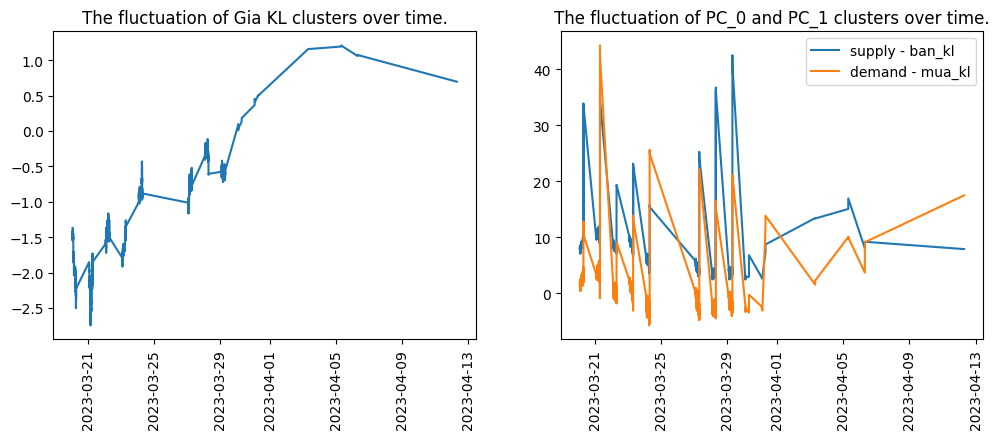

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].set_title("The fluctuation of Gia KL clusters over time.")
k = processed_df[processed_df[:, 3] == 0]
ax[0].plot(pd.to_datetime(k[:, -1]), k[:, 2])
ax[1].set_title("The fluctuation of PC_0 and PC_1 clusters over time.")
ax[1].plot(pd.to_datetime(k[:, -1]), k[:, 0],label = 'supply - ban_kl')
ax[1].plot(pd.to_datetime(k[:, -1]), k[:, 1], label = 'demand - mua_kl')
ax[1].legend()
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)

plt.show()



Ở giai đoạn 1 (cụm đầu tiên - màu vàng) khoảng 10 ngày từ 20/03 - 01/04/2023: Ta thấy giá trị cung và cầu đồng thời giảm xuống và giá phái sinh thì có xu hướng tăng lên. Điều này, có thể giải thích bởi nhiều yếu tố khác nhau như: 
- Tình hình kinh tế ngân hàng: Tình hình kinh tế chưa ổn định, có thể có nhiều rủi ro trong hoạt động kinh doanh của các ngân hàng hoặc do tác động tiêu cực từ thị trường toàn cầu.
- Cổ phiếu ngân hàng: Cổ phiếu ngân hàng có thể đang gặp áp lực bán do các nhà đầu tư lo ngại về tình hình kinh tế và rủi ro trong hoạt động kinh doanh của ngân hàng.
- Độ tin tưởng của khách hàng: Độ tin tưởng của khách hàng cũng có thể giảm do lo ngại về tình hình kinh tế và rủi ro trong hoạt động kinh doanh của ngân hàng. 
- Lợi nhuận của khách hàng: Lợi nhuận của khách hàng có thể bị ảnh hưởng bởi tình hình kinh tế chưa ổn định và các rủi ro trong hoạt động kinh doanh của ngân hàng.
Như vậy, với cầu ổn định, cung giảm dần về cầu và giá cổ phiếu giảm, có thể do các nhà đầu tư lo ngại về tình hình kinh tế và rủi ro trong hoạt động kinh doanh của ngân hàng, dẫn đến áp lực bán cổ phiếu ngân hàng. Tuy nhiên, vì cầu vẫn ổn định nên giá phát sinh có thể tăng để cân bằng giữa cầu và cung.







#### **7.2 - Cluster 2**

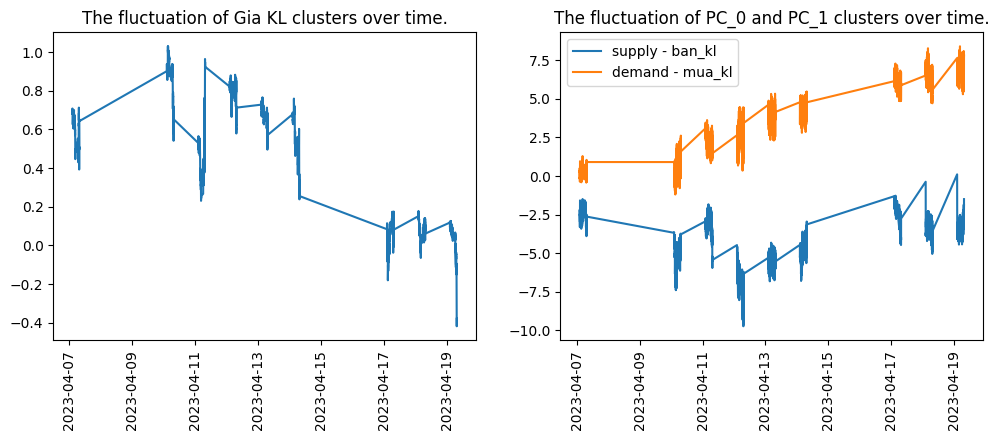

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].set_title("The fluctuation of Gia KL clusters over time.")
k = processed_df[processed_df[:, 3] == 1]
ax[0].plot(pd.to_datetime(k[:, -1]), k[:, 2])
ax[1].set_title("The fluctuation of PC_0 and PC_1 clusters over time.")
ax[1].plot(pd.to_datetime(k[:, -1]), k[:, 0],label = 'supply - ban_kl')
ax[1].plot(pd.to_datetime(k[:, -1]), k[:, 1], label = 'demand - mua_kl')
ax[1].legend()
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)

plt.show()

Ở giai đoạn 2 (cụm thứ 2 - màu xanh lá cây) khoảng 10 ngày tiếp theo từ 01/04 - 10/04/2023: Khi cung giảm xuống gần với cầu, với cầu và cung ổn định và bằng nhau, giá phát sinh ổn định và cầu vượt qua cung, lúc này giá phái sinh tăng mạnh. Điều này có nghĩa là số lượng người muốn mua phái sinh vượt qua số lượng người muốn bán phái sinh, gây nên sự tăng giá. Và có thể được giải thích như sau:
- Tình hình kinh tế ngân hàng: Tình hình kinh tế ổn định hơn, các rủi ro trong hoạt động kinh doanh của ngân hàng được giảm thiểu.
- Cổ phiếu ngân hàng: Cổ phiếu ngân hàng được giữ ổn định do tình hình kinh tế tốt hơn.
- Độ tin tưởng của khách hàng: Độ tin tưởng của khách hàng cải thiện hơn khi tình hình kinh tế được cải thiện và các rủi ro được giảm thiểu.
- Lợi nhuận của khách hàng: Lợi nhuận của khách hàng tăng lên do tình hình kinh tế tốt hơn và các rủi ro được giảm thiểu.

#### **7.3 - Cluster 3**

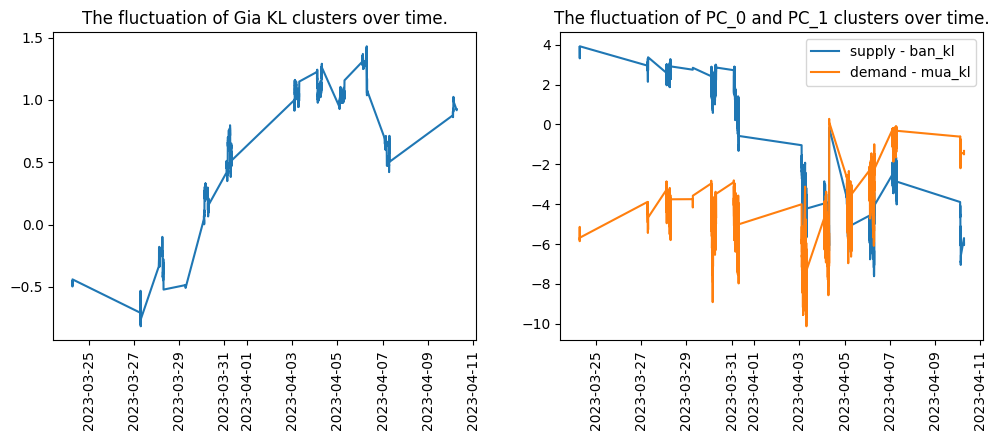

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].set_title("The fluctuation of Gia KL clusters over time.")
k = processed_df[processed_df[:, 3] == 2]
ax[0].plot(pd.to_datetime(k[:, -1]), k[:, 2])
ax[1].set_title("The fluctuation of PC_0 and PC_1 clusters over time.")
ax[1].plot(pd.to_datetime(k[:, -1]), k[:, 0],label = 'supply - ban_kl')
ax[1].plot(pd.to_datetime(k[:, -1]), k[:, 1], label = 'demand - mua_kl')
ax[1].legend()
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)

plt.show()

Ở giai đoạn 3 (cụm thứ 3 - màu xanh dương) trong 10 ngày còn lại: Cầu lớn hơn cung, cầu tăng và cung giảm nhẹ và ổn định. Điều này có thể xảy ra khi tình hình kinh tế ngân hàng đang phát triển tốt, độ tin tưởng của khách hàng đang tăng, và lợi nhận của khách hàng cũng đang tăng. Tuy nhiên, giá phái sinh giảm nhẹ có thể được giải thích bởi việc các nhà đầu tư có xu hướng mua phái sinh để bảo vệ khoản đầu tư của họ. Điều này dẫn đến tăng cầu cho phái sinh và cung giảm có thể là do các nhà đầu tư sẽ có xu hướng bán phái sinh để cắt lỗ hoặc chuyển sang đầu tư khác dẫn đến giảm cung cho phái sinh. Một cách giải thích khác có thể các nhà đầu tư đã đánh giá cao tiềm năng tăng trưởng của ngân hàng trong giai đoạn này và đã đưa giá cổ phiếu lên mức cao, nhưng cũng đã bắt đầu bán ra để chốt lời, dẫn đến giá phát sinh giảm nhẹ.

## **8. Model LSTM Stock Market Prediction**

In [42]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(X_std):
        X_train, X_test = X_std[:len(train_index)], X_std[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].ravel(), y[len(train_index): (len(train_index)+len(test_index))].ravel()

In [35]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [45]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                27264     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 27297 (106.63 KB)
Trainable params: 27297 (106.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:

history = lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)


Epoch 1/50
3471/3471 [==============================] - 8s 2ms/step - loss: 0.0357
Epoch 2/50
3471/3471 [==============================] - 9s 3ms/step - loss: 0.0229
Epoch 3/50
3471/3471 [==============================] - 7s 2ms/step - loss: 0.0101
Epoch 4/50
3471/3471 [==============================] - 6s 2ms/step - loss: 0.0058
Epoch 5/50
3471/3471 [==============================] - 5s 2ms/step - loss: 0.0053
Epoch 6/50
3471/3471 [==============================] - 6s 2ms/step - loss: 0.0047
Epoch 7/50
3471/3471 [==============================] - 8s 2ms/step - loss: 0.0058
Epoch 8/50
3471/3471 [==============================] - 6s 2ms/step - loss: 0.0044
Epoch 9/50
3471/3471 [==============================] - 6s 2ms/step - loss: 0.0058
Epoch 10/50
3471/3471 [==============================] - 10s 3ms/step - loss: 0.0042
Epoch 11/50
3471/3471 [==============================] - 13s 4ms/step - loss: 0.0043
Epoch 12/50
3471/3471 [==============================] - 12s 4ms/step - loss: 0.004

In [47]:
y_pred= lstm.predict(X_test)

87/87 [==============================] - 1s 2ms/step


In [48]:
mse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 0.06525994507587382
R2 score: 0.2573391276614926


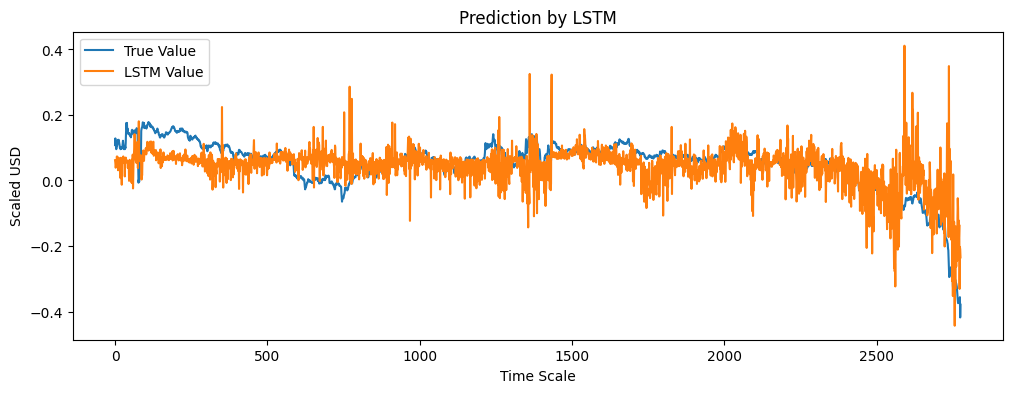

In [49]:
plt.figure(figsize = (12,4))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

## **9. Conclusion**

Bằng cách phân tích biến động của cung và cầu, chúng ta có thể đưa ra dự báo về hướng di chuyển tiềm năng của giá phái sinh trong tương lai, giúp nhà đầu tư và người quan tâm có cái nhìn sâu sắc hơn về thị trường chứng khoán.

Qua đồ án, hiểu thêm về lợi ích của PCA trong việc giúp giảm chiều và chọn lọc features 1 cách hiệu quả. Áp dụng K-Means phân cụm để nhận dạng, so sánh, đánh giá các nhóm features và từ đây đưa ra phương hướng phân tích dữ liệu.